# Anova test for diff between diff and same layer, HPS and LPS layer

In [43]:
pip install Statsmodels 


Note: you may need to restart the kernel to use updated packages.


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import Statsmodels.api as sm

df = pd.read_csv('/home/administrator/experiments/10_ids_300_img_per_id_2/vgg16/results/comparisons.csv')
title = '10_ids_300_img_per_id_2_N_views'
treshold = 14.389
# df = pd.read_csv(r"/home/administrator/experiments/500_ids_300_img_per_id_2/vgg16/results/100_ids_non_frontal_300_per_id_comparison.csv")
pd.set_option('display.max_rows', df.shape[0]+1)

print(df)

                                            Unnamed: 0       conv5      conv3  \
0                         ('ak_ref.png', 'ba_ref.png')   79.415820  630.51780   
1                         ('ba_ref.png', 'dd_ref.png')   78.721020  514.18304   
2                         ('dd_ref.png', 'gc_ref.png')   80.359480  460.36570   
3                         ('gc_ref.png', 'jb_ref.png')   77.681480  452.00537   
4                         ('jb_ref.png', 'js_ref.png')   86.858390  467.91820   
5                         ('js_ref.png', 'md_ref.png')   95.045970  517.53030   
6                         ('md_ref.png', 'mz_ref.png')   74.989360  467.12990   
7                         ('mz_ref.png', 'rn_ref.png')   84.494760  490.75653   
8                         ('rn_ref.png', 'th_ref.png')   80.998330  530.12200   
9                         ('th_ref.png', 'ak_ref.png')   85.455080  691.27460   
10                ('CM46_2.png', 'Cpict47_set1_0.png')   49.254120  402.21770   
11                ('CM47_2.p

In [111]:
# change unnamed column to 'pairs'
df = df.rename(columns = {'Unnamed: 0':'pairs'})
df

,pairs,conv5,conv3,output,conv1,conv4,conv2,fc6,input,fc8,fc7,type
0,"('ak_ref.png', 'ba_ref.png')",79.415820,630.51780,13.569631,302.74650,367.818000,489.16376,27.279617,176.927380,13.569631,15.319791,diff_pairs
1,"('ba_ref.png', 'dd_ref.png')",78.721020,514.18304,16.338696,222.76921,335.301270,341.46564,28.501022,142.596950,16.338696,17.320618,diff_pairs
2,"('dd_ref.png', 'gc_ref.png')",80.359480,460.36570,15.016006,206.46687,318.384520,314.05594,29.366621,118.918950,15.016006,15.906242,diff_pairs
3,"('gc_ref.png', 'jb_ref.png')",77.681480,452.00537,23.314068,225.98325,312.487980,307.50583,29.700697,137.082900,23.314068,19.575735,diff_pairs
4,"('jb_ref.png', 'js_ref.png')",86.858390,467.91820,33.783466,249.55067,315.729280,338.77332,37.497715,162.429760,33.783466,26.324335,diff_pairs
5,"('js_ref.png', 'md_ref.png')",95.045970,517.53030,36.761826,322.15448,342.327330,395.84952,41.213158,225.679430,36.761826,29.257366,diff_pairs
6,"('md_ref.png', 'mz_ref.png')",74.989360,467.12990,14.839152,290.00412,316.911250,354.77625,26.334108,174.975140,14.839152,15.571935,diff_pairs
7,"('mz_ref.png', 'rn_ref.png')",84.494760,490.75653,23.052660,248.86472,326.086120,336.81836,32.453194,159.546300,23.052660,21.149492,diff_pairs
8,"('rn_ref.png', 'th_ref.png')",80.998330,530.12200,11.502162,262.81340,352.663900,383.03925,28.596622,152.516480,11.502162,14.940473,diff_pairs
9,"('th_ref.png', 'ak_ref.png')",85.455080,691.27460,14.140593,351.24008,418.692100,542.70240,27.849953,201.079940,14.140593,15.377259,diff_pairs


In [112]:
#split the tuples to two columns
df_splited = df['pairs'].str.split(',', expand=True)

#adding   
df.insert(loc=0, column='img1', value=df_splited[0] )
df.insert(loc=1, column='img2', value=df_splited[1] )

  
# Dropping old Name columns 
df.drop(columns =["pairs"], inplace = True) 


In [113]:
df

,img1,img2,conv5,conv3,output,conv1,conv4,conv2,fc6,input,fc8,fc7,type
0,('ak_ref.png','ba_ref.png'),79.415820,630.51780,13.569631,302.74650,367.818000,489.16376,27.279617,176.927380,13.569631,15.319791,diff_pairs
1,('ba_ref.png','dd_ref.png'),78.721020,514.18304,16.338696,222.76921,335.301270,341.46564,28.501022,142.596950,16.338696,17.320618,diff_pairs
2,('dd_ref.png','gc_ref.png'),80.359480,460.36570,15.016006,206.46687,318.384520,314.05594,29.366621,118.918950,15.016006,15.906242,diff_pairs
3,('gc_ref.png','jb_ref.png'),77.681480,452.00537,23.314068,225.98325,312.487980,307.50583,29.700697,137.082900,23.314068,19.575735,diff_pairs
4,('jb_ref.png','js_ref.png'),86.858390,467.91820,33.783466,249.55067,315.729280,338.77332,37.497715,162.429760,33.783466,26.324335,diff_pairs
5,('js_ref.png','md_ref.png'),95.045970,517.53030,36.761826,322.15448,342.327330,395.84952,41.213158,225.679430,36.761826,29.257366,diff_pairs
6,('md_ref.png','mz_ref.png'),74.989360,467.12990,14.839152,290.00412,316.911250,354.77625,26.334108,174.975140,14.839152,15.571935,diff_pairs
7,('mz_ref.png','rn_ref.png'),84.494760,490.75653,23.052660,248.86472,326.086120,336.81836,32.453194,159.546300,23.052660,21.149492,diff_pairs
8,('rn_ref.png','th_ref.png'),80.998330,530.12200,11.502162,262.81340,352.663900,383.03925,28.596622,152.516480,11.502162,14.940473,diff_pairs
9,('th_ref.png','ak_ref.png'),85.455080,691.27460,14.140593,351.24008,418.692100,542.70240,27.849953,201.079940,14.140593,15.377259,diff_pairs


In [114]:
#reorder columns by layer order
df = df[['img1', 'img2', 'input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8','type' ]]

In [115]:
df

,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,('ak_ref.png','ba_ref.png'),176.927380,302.74650,489.16376,630.51780,367.818000,79.415820,27.279617,15.319791,13.569631,diff_pairs
1,('ba_ref.png','dd_ref.png'),142.596950,222.76921,341.46564,514.18304,335.301270,78.721020,28.501022,17.320618,16.338696,diff_pairs
2,('dd_ref.png','gc_ref.png'),118.918950,206.46687,314.05594,460.36570,318.384520,80.359480,29.366621,15.906242,15.016006,diff_pairs
3,('gc_ref.png','jb_ref.png'),137.082900,225.98325,307.50583,452.00537,312.487980,77.681480,29.700697,19.575735,23.314068,diff_pairs
4,('jb_ref.png','js_ref.png'),162.429760,249.55067,338.77332,467.91820,315.729280,86.858390,37.497715,26.324335,33.783466,diff_pairs
5,('js_ref.png','md_ref.png'),225.679430,322.15448,395.84952,517.53030,342.327330,95.045970,41.213158,29.257366,36.761826,diff_pairs
6,('md_ref.png','mz_ref.png'),174.975140,290.00412,354.77625,467.12990,316.911250,74.989360,26.334108,15.571935,14.839152,diff_pairs
7,('mz_ref.png','rn_ref.png'),159.546300,248.86472,336.81836,490.75653,326.086120,84.494760,32.453194,21.149492,23.052660,diff_pairs
8,('rn_ref.png','th_ref.png'),152.516480,262.81340,383.03925,530.12200,352.663900,80.998330,28.596622,14.940473,11.502162,diff_pairs
9,('th_ref.png','ak_ref.png'),201.079940,351.24008,542.70240,691.27460,418.692100,85.455080,27.849953,15.377259,14.140593,diff_pairs


In [116]:
#remove  HPS,LPS,SAME type.

df = df[df.type.str.contains("frontal|diff_pairs")]


In [117]:
df

,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,('ak_ref.png','ba_ref.png'),176.927380,302.74650,489.16376,630.51780,367.818000,79.415820,27.279617,15.319791,13.569631,diff_pairs
1,('ba_ref.png','dd_ref.png'),142.596950,222.76921,341.46564,514.18304,335.301270,78.721020,28.501022,17.320618,16.338696,diff_pairs
2,('dd_ref.png','gc_ref.png'),118.918950,206.46687,314.05594,460.36570,318.384520,80.359480,29.366621,15.906242,15.016006,diff_pairs
3,('gc_ref.png','jb_ref.png'),137.082900,225.98325,307.50583,452.00537,312.487980,77.681480,29.700697,19.575735,23.314068,diff_pairs
4,('jb_ref.png','js_ref.png'),162.429760,249.55067,338.77332,467.91820,315.729280,86.858390,37.497715,26.324335,33.783466,diff_pairs
5,('js_ref.png','md_ref.png'),225.679430,322.15448,395.84952,517.53030,342.327330,95.045970,41.213158,29.257366,36.761826,diff_pairs
6,('md_ref.png','mz_ref.png'),174.975140,290.00412,354.77625,467.12990,316.911250,74.989360,26.334108,15.571935,14.839152,diff_pairs
7,('mz_ref.png','rn_ref.png'),159.546300,248.86472,336.81836,490.75653,326.086120,84.494760,32.453194,21.149492,23.052660,diff_pairs
8,('rn_ref.png','th_ref.png'),152.516480,262.81340,383.03925,530.12200,352.663900,80.998330,28.596622,14.940473,11.502162,diff_pairs
9,('th_ref.png','ak_ref.png'),201.079940,351.24008,542.70240,691.27460,418.692100,85.455080,27.849953,15.377259,14.140593,diff_pairs


In [118]:
df.reset_index()

,index,img1,img2,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,0,('ak_ref.png','ba_ref.png'),176.927380,302.74650,489.16376,630.51780,367.818000,79.415820,27.279617,15.319791,13.569631,diff_pairs
1,1,('ba_ref.png','dd_ref.png'),142.596950,222.76921,341.46564,514.18304,335.301270,78.721020,28.501022,17.320618,16.338696,diff_pairs
2,2,('dd_ref.png','gc_ref.png'),118.918950,206.46687,314.05594,460.36570,318.384520,80.359480,29.366621,15.906242,15.016006,diff_pairs
3,3,('gc_ref.png','jb_ref.png'),137.082900,225.98325,307.50583,452.00537,312.487980,77.681480,29.700697,19.575735,23.314068,diff_pairs
4,4,('jb_ref.png','js_ref.png'),162.429760,249.55067,338.77332,467.91820,315.729280,86.858390,37.497715,26.324335,33.783466,diff_pairs
5,5,('js_ref.png','md_ref.png'),225.679430,322.15448,395.84952,517.53030,342.327330,95.045970,41.213158,29.257366,36.761826,diff_pairs
6,6,('md_ref.png','mz_ref.png'),174.975140,290.00412,354.77625,467.12990,316.911250,74.989360,26.334108,15.571935,14.839152,diff_pairs
7,7,('mz_ref.png','rn_ref.png'),159.546300,248.86472,336.81836,490.75653,326.086120,84.494760,32.453194,21.149492,23.052660,diff_pairs
8,8,('rn_ref.png','th_ref.png'),152.516480,262.81340,383.03925,530.12200,352.663900,80.998330,28.596622,14.940473,11.502162,diff_pairs
9,9,('th_ref.png','ak_ref.png'),201.079940,351.24008,542.70240,691.27460,418.692100,85.455080,27.849953,15.377259,14.140593,diff_pairs


In [119]:
max_value_df = df.max()
max_value_df

img1      ('th_ref.png'
img2      'th_ref.png')
input           308.931
conv1           546.141
conv2           877.272
conv3           703.375
conv4           418.692
conv5            95.046
fc6             41.2132
fc7             29.2574
fc8             36.7618
type        frontal-ref
dtype: object

In [120]:
df = df.reset_index(drop=True)
df
df = df.drop(columns=['img1', 'img2'])

In [121]:
normalized_treshold = treshold/max_value_df['fc7']


In [122]:
df
# df['input']= (df['input']/df['input'].max()) 

for x in df.drop(columns=['type']).columns:
    df[x]= (df[x]/df[x].max()) 

In [123]:
df

,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8,type
0,0.572708,0.554338,0.557596,0.896418,0.878493,0.835552,0.661915,0.523622,0.369123,diff_pairs
1,0.461582,0.407897,0.389236,0.731023,0.800830,0.828242,0.691552,0.592009,0.444447,diff_pairs
2,0.384937,0.378047,0.357991,0.654510,0.760426,0.845480,0.712554,0.543666,0.408467,diff_pairs
3,0.443733,0.413782,0.350525,0.642624,0.746343,0.817304,0.720661,0.669087,0.634192,diff_pairs
4,0.525780,0.456935,0.386167,0.665247,0.754085,0.913857,0.909848,0.899751,0.918982,diff_pairs
5,0.730517,0.589875,0.451228,0.735782,0.817611,1.000000,1.000000,1.000000,1.000000,diff_pairs
6,0.566389,0.531006,0.404408,0.664126,0.756908,0.788980,0.638973,0.532240,0.403657,diff_pairs
7,0.516446,0.455679,0.383938,0.697717,0.778821,0.888988,0.787447,0.722878,0.627081,diff_pairs
8,0.493691,0.481219,0.436625,0.753683,0.842299,0.852202,0.693871,0.510657,0.312883,diff_pairs
9,0.650889,0.643131,0.618625,0.982797,1.000000,0.899092,0.675754,0.525586,0.384654,diff_pairs


In [124]:
#mean of each columns by type of pairs
means_df = df.groupby(['type']).mean()
means_df = means_df.rename_axis("layers", axis="columns")
means_df

layers,input,conv1,conv2,conv3,conv4,conv5,fc6,fc7,fc8
type,,,,,,,,,
diff_pairs,0.446347,0.437462,0.425583,0.711616,0.722523,0.721127,0.600010,0.499195,0.401387
frontal-half_left,0.842708,0.900379,0.898109,0.935548,0.704209,0.606903,0.460870,0.311543,0.197977
frontal-quarter_left,0.729969,0.675167,0.660342,0.851909,0.648996,0.523707,0.393465,0.253534,0.135501
frontal-ref,0.342660,0.289139,0.273809,0.478097,0.402292,0.336560,0.263960,0.183172,0.107097


In [125]:
means_df = means_df.transpose()
means_df

type,diff_pairs,frontal-half_left,frontal-quarter_left,frontal-ref
layers,,,,
input,0.446347,0.842708,0.729969,0.342660
conv1,0.437462,0.900379,0.675167,0.289139
conv2,0.425583,0.898109,0.660342,0.273809
conv3,0.711616,0.935548,0.851909,0.478097
conv4,0.722523,0.704209,0.648996,0.402292
conv5,0.721127,0.606903,0.523707,0.336560
fc6,0.600010,0.460870,0.393465,0.263960
fc7,0.499195,0.311543,0.253534,0.183172
fc8,0.401387,0.197977,0.135501,0.107097


In [126]:
# means_df = means_df.reindex(['input', 'conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'fc6', 'fc7', 'fc8' ])
# means_df

In [127]:
plot_kwargs={'grid':True,'figsize':(20,8),
 'fontsize':12}


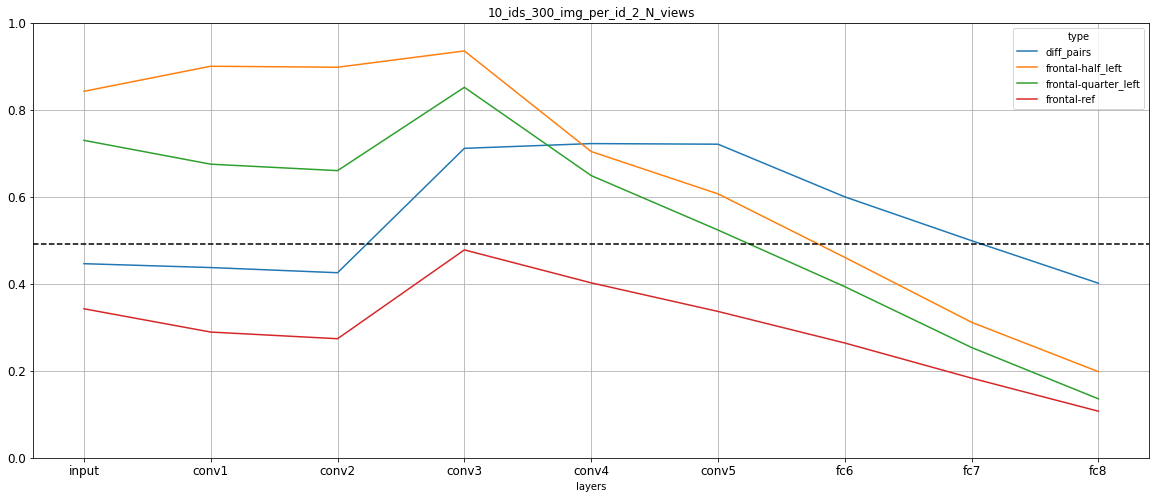

In [128]:
plot = means_df.plot(**plot_kwargs, title = title, ylim = [0,1])
plt.axhline(y=normalized_treshold, color='black', linestyle='--')
